<a href="https://colab.research.google.com/github/mousDZ/DevOps-Guide/blob/master/projectRains_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des lib standards

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import de la raw data

In [2]:
link_to_data = "https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/rains.csv"

In [3]:
df = pd.read_csv(link_to_data)

# pour accéder facilement aux différents types de data après le stransformations
num_data_columns = df.select_dtypes(include=np.number)
cat_data_columns = df.select_dtypes(exclude=np.number)

# Decouverte de la data

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Newcastle,13.2,NaN,0.0,NaN,NaN,NaN,NaN,NW,NW,6.0,19.0,50.0,24.0,NaN,NaN,3.0,4.0,21.8,30.6,No,No
1,2008-12-02,Newcastle,NaN,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NE,NaN,19.0,NaN,59.0,NaN,NaN,NaN,0.0,NaN,25.4,No,No
2,2008-12-03,Newcastle,16.2,32.2,0.0,NaN,NaN,NaN,NaN,N,SE,2.0,2.0,74.0,26.0,NaN,NaN,4.0,4.0,22.2,32.0,No,No
3,2008-12-04,Newcastle,19.2,24.0,0.0,NaN,NaN,NaN,NaN,SE,SE,22.0,22.0,66.0,61.0,NaN,NaN,7.0,5.0,20.4,23.0,No,No
4,2008-12-05,Newcastle,18.8,30.2,0.0,NaN,NaN,NaN,NaN,NE,NaN,4.0,NaN,85.0,NaN,NaN,NaN,8.0,NaN,20.0,NaN,No,No


A premiere vue, on voit qu'il y a beaucoup de colonnes et des valeurs Nan

## description des variables

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,24781.000000,24885.000000,24570.000000,16385.000000,16142.000000,21011.000000,25073.000000,24389.000000,24800.000000,24141.000000,21854.000000,21852.000000,16480.000000,15527.000000,24883.000000,24183.000000
mean,13.255958,23.627928,2.568637,5.180128,7.598346,38.323021,12.250668,17.501989,66.912621,51.880742,1018.254873,1015.802009,4.214078,4.237264,17.850520,22.018224
std,5.828184,5.911984,8.955230,3.421251,3.796346,13.483681,9.282323,9.349560,16.448132,17.757020,6.786389,6.637024,2.858866,2.699229,5.931133,5.722596
min,-8.000000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,3.000000,4.000000,982.300000,985.500000,0.000000,0.000000,-1.300000,3.700000
25%,9.500000,19.400000,0.000000,2.600000,4.800000,30.000000,6.000000,11.000000,56.000000,40.000000,1013.700000,1011.300000,1.000000,1.000000,13.600000,18.000000
50%,13.500000,23.500000,0.000000,4.600000,8.500000,37.000000,11.000000,17.000000,67.000000,52.000000,1018.200000,1015.800000,5.000000,5.000000,17.800000,21.900000
75%,17.600000,27.700000,0.800000,7.200000,10.500000,46.000000,17.000000,22.000000,78.000000,63.000000,1022.800000,1020.300000,7.000000,7.000000,22.300000,25.900000
max,33.900000,46.400000,240.000000,44.000000,13.900000,122.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,39.000000,45.400000


## séparation des variables (numerique et categorielle)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25631 entries, 0 to 25630
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           25631 non-null  object 
 1   Location       25631 non-null  object 
 2   MinTemp        24781 non-null  float64
 3   MaxTemp        24885 non-null  float64
 4   Rainfall       24570 non-null  float64
 5   Evaporation    16385 non-null  float64
 6   Sunshine       16142 non-null  float64
 7   WindGustDir    21009 non-null  object 
 8   WindGustSpeed  21011 non-null  float64
 9   WindDir9am     23020 non-null  object 
 10  WindDir3pm     23947 non-null  object 
 11  WindSpeed9am   25073 non-null  float64
 12  WindSpeed3pm   24389 non-null  float64
 13  Humidity9am    24800 non-null  float64
 14  Humidity3pm    24141 non-null  float64
 15  Pressure9am    21854 non-null  float64
 16  Pressure3pm    21852 non-null  float64
 17  Cloud9am       16480 non-null  float64
 18  Cloud3

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("nombre de variables categorielles: {}".format(len(categorical_features)))
print("variables categorielles: ",categorical_features)
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("nombre de variable numerique: {}".format(len(numerical_features)))
print("variables numeriques : ",numerical_features)

nombre de variables categorielles: 7
variables categorielles:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
nombre de variable numerique: 16
variables numeriques :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [8]:
df.describe(include=[np.number])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,24781.000000,24885.000000,24570.000000,16385.000000,16142.000000,21011.000000,25073.000000,24389.000000,24800.000000,24141.000000,21854.000000,21852.000000,16480.000000,15527.000000,24883.000000,24183.000000
mean,13.255958,23.627928,2.568637,5.180128,7.598346,38.323021,12.250668,17.501989,66.912621,51.880742,1018.254873,1015.802009,4.214078,4.237264,17.850520,22.018224
std,5.828184,5.911984,8.955230,3.421251,3.796346,13.483681,9.282323,9.349560,16.448132,17.757020,6.786389,6.637024,2.858866,2.699229,5.931133,5.722596
min,-8.000000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,3.000000,4.000000,982.300000,985.500000,0.000000,0.000000,-1.300000,3.700000
25%,9.500000,19.400000,0.000000,2.600000,4.800000,30.000000,6.000000,11.000000,56.000000,40.000000,1013.700000,1011.300000,1.000000,1.000000,13.600000,18.000000
50%,13.500000,23.500000,0.000000,4.600000,8.500000,37.000000,11.000000,17.000000,67.000000,52.000000,1018.200000,1015.800000,5.000000,5.000000,17.800000,21.900000
75%,17.600000,27.700000,0.800000,7.200000,10.500000,46.000000,17.000000,22.000000,78.000000,63.000000,1022.800000,1020.300000,7.000000,7.000000,22.300000,25.900000
max,33.900000,46.400000,240.000000,44.000000,13.900000,122.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,39.000000,45.400000


In [9]:
df.describe(exclude=[np.number])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,25631,25631,21009,23020,23947,24570,24569
unique,3436,8,16,16,16,2,2
top,2012-04-03,Canberra,SSE,N,SE,No,No
freq,8,3436,1833,2196,2357,18890,18891


premier constat : la variable date a trop de valeurs uniques ( des Dates), une des transformations est la transformation de date en ( jours, mois, année)


## recherche des valeurs manquantes:

In [11]:
df.isna().sum()

Date                 0
Location             0
MinTemp            850
MaxTemp            746
Rainfall          1061
Evaporation       9246
Sunshine          9489
WindGustDir       4622
WindGustSpeed     4620
WindDir9am        2611
WindDir3pm        1684
WindSpeed9am       558
WindSpeed3pm      1242
Humidity9am        831
Humidity3pm       1490
Pressure9am       3777
Pressure3pm       3779
Cloud9am          9151
Cloud3pm         10104
Temp9am            748
Temp3pm           1448
RainToday         1061
RainTomorrow      1062
dtype: int64

il y a une neccessité de remplacer des valeurs manquantes par la mediane pour les variables numeriques  et le mode pour les variables categorielles

# Nettoyage et normalisation de la data

## Transformation de la date

In [5]:
from datetime import datetime

df["year"] = df["Date"].apply(datetime.fromisoformat).apply(lambda d: d.year)
df["month"] = df["Date"].apply(datetime.fromisoformat).apply(lambda d: d.month)
df["day"] = df["Date"].apply(datetime.fromisoformat).apply(lambda d: d.day)
df = df.drop("Date", axis=1)

## Separation des valeurs numériques et catégorielles + completion des NA

In [6]:
num_data = df.select_dtypes(include=np.number).fillna(df.select_dtypes(include=np.number).median())

In [7]:
cat_data = df.select_dtypes(exclude=np.number).fillna(df.select_dtypes(exclude=np.number).mode().loc[0])

In [8]:
df = pd.concat([num_data, cat_data], axis=1)

## Labelisation des strings et binarisation

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_columns = df.select_dtypes(exclude=np.number).columns

# un moyen de garder en mémoire la labélisation des strings
encoders = {c: LabelEncoder().fit(df[c]) for c in cat_columns}

# on transforme toutes les variables catégroielles en numérique
df[cat_columns] = df.select_dtypes(exclude=np.number).apply(LabelEncoder().fit_transform)

## Obtenir facilement X et y

In [10]:
def get_x_y(my_dataset):

    X = my_dataset.drop(["RainTomorrow"], axis=1)
    y = my_dataset["RainTomorrow"]
    
    return X, y

## Standarsiation de la donnée

In [11]:
from sklearn.preprocessing import MinMaxScaler

# on applique la standardisation sur X pour que la meme moyenne soit utilisée pour les prochains traitements
scaler = MinMaxScaler()
X, y = get_x_y(df)
X_scaled = scaler.fit_transform(X)

## Recherche des data abbérantes

On recherche les outliers

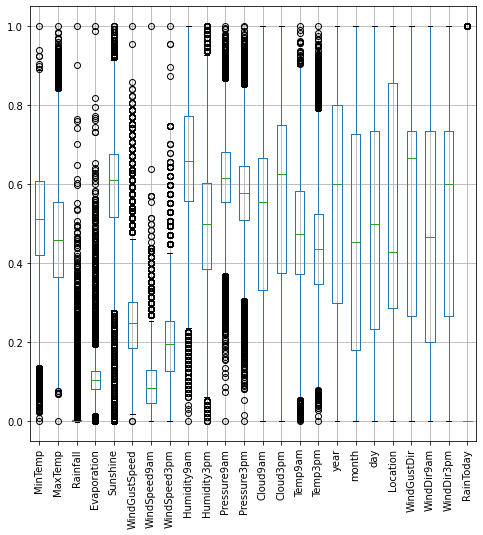

In [12]:
df_explore = pd.DataFrame(X_scaled, columns=X.columns)
df_explore.boxplot(figsize=(8, 8))
plt.xticks(rotation=90);

On remarque qu'on a énormément d'outliers sur Rainfall

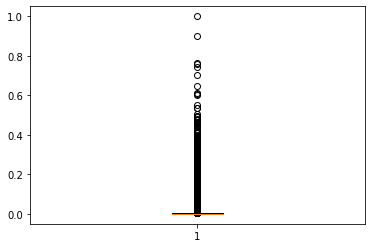

In [13]:
plt.boxplot(df_explore["Rainfall"]);

Ces outliers ne sont pas des valeurs irréalistes, elles peuvent correspondre à une tempête par exemple. Cependant ces valeurs risques de perturber le modèle. On retire donc les outliers de cette variable

### utilisation de la méthode 1.5 IQR: Inter Quartile Range.

On va retirer tout ce qui est en dehors de 1.5 IQR par rapport à la médiane

In [14]:
rainfall = df_explore["Rainfall"]
q3 = np.quantile(rainfall, 0.75)
q1 = np.quantile(rainfall, 0.25)

iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

rainfall_wo_outliers = df_explore[(rainfall <= lower_bound) | (rainfall >= upper_bound)]["Rainfall"]

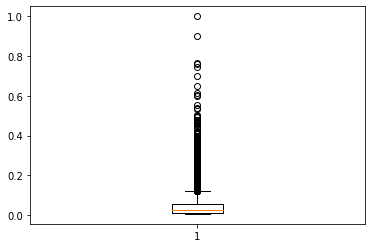

In [15]:
plt.boxplot(rainfall_wo_outliers);

On recréé le dataframe sans les lignes des outliers de rainfall

# Premiere regression logistique

In [16]:
df_wo_out = df[(rainfall <= lower_bound) | (rainfall >= upper_bound)]
df_wo_out.shape

(5209, 25)

In [17]:
from sklearn.model_selection import train_test_split

X_wo_out, y_wo_out = get_x_y(df_wo_out)

X_wo_out_train, X_wo_out_test, y_wo_out_train, y_wo_out_test = train_test_split(X_wo_out, y_wo_out, test_size=0.25, random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
X_wo_out_train_scaled = scaler.fit_transform(X_wo_out_train)

lr.fit(X_wo_out_train_scaled, y_wo_out_train)

X_wo_out_test_scaled = scaler.fit_transform(X_wo_out_test)
prediction = lr.predict(X_wo_out_test_scaled)

In [19]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

balanced_accuracy_score(y_wo_out_test, prediction)

0.7373056675945389

In [20]:
confusion_matrix(y_wo_out_test, prediction, normalize="true")

array([[0.83045977, 0.16954023],
       [0.35584843, 0.64415157]])

In [21]:
print(classification_report(y_wo_out_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       696
           1       0.77      0.64      0.70       607

    accuracy                           0.74      1303
   macro avg       0.75      0.74      0.74      1303
weighted avg       0.75      0.74      0.74      1303



# Première conclusion

On voit que le modèle arrive à bien prédire les négatifs par contre un peu moins les positifs. Il y a un désequilibre de classe mais pas très prononcé. Le désequilibre était beaucoup plus prononcé avant la suppression des outliers de Rainfall.

In [22]:
y_wo_out_train.value_counts(normalize=True)

0    0.536354
1    0.463646
Name: RainTomorrow, dtype: float64

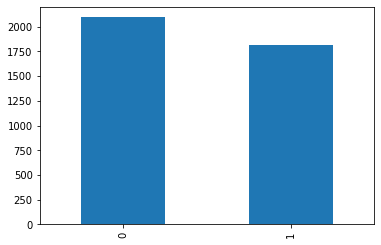

In [23]:
y_wo_out_train.value_counts().plot(kind='bar');

La cellule précédente confirme l'idée du léger désequilibre de classes lorsqu'on retire les outliers.

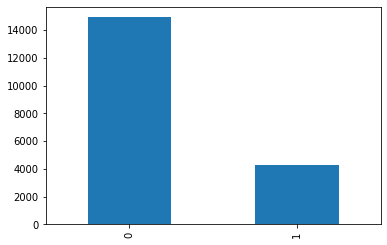

In [24]:
X, y = get_x_y(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
y_train.value_counts().plot(kind='bar');

Le desequilibre de classe est beaucoup plus prononcé si on avait pas retiré les outliers de la classe positive

# Reglage du pb de desequilibre de classe ( à utiliser si on fait déjà la suppression des outliers de Rainfall ?)

On va rééchantilloner et réduire la taille des données de la classe majoritaire, i.e la classe negative

In [25]:
def resample(my_dataset):
    

    indexes_negatives = my_dataset[my_dataset["RainTomorrow"] == 0].index
    indexes_positives = my_dataset[my_dataset["RainTomorrow"] == 1].index
    
    df_negative_resample =  my_dataset.loc[indexes_negatives].sample(n=indexes_positives.shape[0], random_state=1)
    df_positive = my_dataset.loc[indexes_positives]
    df_resample = pd.concat([df_negative_resample, df_positive])
    
    return df_resample

---

Tout ce qui suit n'est pas à jour

# On retente l'algo sur le dataset resample

In [26]:
X, y = get_x_y(resample(dataset))

NameError: ignored

In [ ]:
y.value_counts().plot(kind='bar');

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# on applique la standardisation sur X_train pour que la meme moyenne soit utilisée pour les prochains traitements
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# on refait la prediction mais avec les données standardisées
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

In [ ]:
# on va appliquer notre modèle sur les X_test
# avant ça il faut standardiser les data de test avec le scaler qui a déjà la moyenne des valeurs d'entrainement
X_test_scaled = scaler.transform(X_test)

In [ ]:
prediction_from_scaled = lr.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, prediction_from_scaled)

In [ ]:
confusion_matrix(y_test, prediction_from_scaled, normalize="true")

In [ ]:
print(classification_report(y_test, prediction_from_scaled))

On a un f1 score moins bon pour la classe negative mais nettement meilleur pour la classe positive. Les prédictions sont mieux réparties.

# Selection de variables (feature selection)

On cherche les variables utiles. Pour ça on va créer un selecteur qui va selectioner les variables qui ont le score le plus élevé de chi2 qui est la correlation entre les variables de X et la target y

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
selector = SelectKBest(chi2, k=10)

In [ ]:
selector.fit_transform(X_scaled, y)

In [ ]:
X_less = X.loc[:,selector.get_support()]
pd.Series(chi2(X_less, y)[0], index=X_less.columns).plot(kind='bar')

Humidity3pm et Rainfall sont les variables qui influent le plus la target y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_less, y, test_size=0.25, random_state=1)

In [ ]:
# on applique la standardisation sur X_train pour que la meme moyenne soit utilisée pour les prochains traitements
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# on refait la prediction mais avec les données standardisées
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

In [ ]:
# on va appliquer notre modèle sur les X_test
# avant ça il faut standardiser les data de test avec le scaler qui a déjà la moyenne des valeurs d'entrainement
X_test_scaled = scaler.transform(X_test)

In [ ]:
prediction_from_scaled = lr.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, prediction_from_scaled)

In [ ]:
confusion_matrix(y_test, prediction_from_scaled, normalize="true")

In [ ]:
print(classification_report(y_test, prediction_from_scaled))

Avec les 10 première variables dont le test du chi2 est le plus élévé on obtient les même résultats qu'avec toutes les variables, donc seules les 10 premieres sont importantes.

# Test avec PCA

In [ ]:
X, y = get_x_y(dataset)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
liste = []
for i in range(1, 15):
    pca = PCA(n_components=i)
    pca.fit_transform(X)
    liste.append(sum(pca.explained_variance_ratio_))
plt.hlines(0.95, 1, 15)
plt.plot(liste)

le graphe ci dessus confirme que 9 composantes principales suffisent à expliquer 95% de la variance globale

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=9)

# nouvelles variables
X_scaled_pca = pca.fit_transform(X_scaled)

In [ ]:
print(" Nombre de dimensions:",pca.n_components_)
print("Pourcentage de variance expliquée par chaque dimension:\n \n")

for i in range(9):
    
    print(f"Dimension {i}: {pca.explained_variance_ratio_[i]}")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.25, random_state=1)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
prediction = lr.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, prediction))